In [1]:
from sklearn.neighbors import KDTree, BallTree
from _navigable_small_world_graph import NSWGraph
import faiss 
import nmslib
import numpy as np
import os
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def balltree(X, query):
    start = time.time()
    tree = BallTree(X, leaf_size=2)
    dist, ind = tree.query(query[:1], k=5)
    end = time.time()
    t = end - start
    t = round(t,5)
    return t, ind[0].tolist()

def kdtree(X, query):
    start = time.time()
    tree = KDTree(X, leaf_size=2)
    dist, ind = tree.query(query[:1], k=5)
    end = time.time()
    t = end - start
    t = round(t,5)
    return t, ind[0].tolist()

def nswg(X, query):
    start = time.time()
    g = NSWGraph(len(X), len(X[0]))
    nodes = g.build_navigable_graph(X)
    closests = g.multi_search(query[0], top=5)
    end = time.time()
    t = end - start
    t = round(t,5)
    return t, closests

def fais(X, query):
    start = time.time()
    d = len(X[0])
    index = faiss.IndexFlatL2(d) 
    index.add(np.ascontiguousarray(X))
    D, I = index.search(query, 5)
    end = time.time()
    t = end - start
    t = round(t,5)
    return t, I[0].tolist()
def hnsw(X, query):
    start = time.time()
    index = nmslib.init(method='hnsw', space='l2')
    index.addDataPointBatch(X)
    index.createIndex({'post': 2})
    ids, distances = index.knnQuery(query, k=5)
    end = time.time()
    t = end - start
    t = round(t,5)
    return t, ids.tolist()

In [ ]:
dimensions = [64, 128, 512, 1000, 5000, 10000, 25000, 50000]
n = 500
nsw = []
ball = []
kd = []
faisses = []
hnsws = []
for d in dimensions:
    np.random.seed(1234) 
    X = np.random.random((n, d)).astype('float32')
    query = np.random.random((1, d)).astype('float32')
    t, Iball = balltree(X,query)
    ball.append(t)
    
    t, Ikd = kdtree(X,query)
    kd.append(t)
    
    t, Inswg = nswg(X,query)
    nsw.append(t)
    
    t, Ifaiss = fais(X,query)
    faisses.append(t)
    
    t, Ihnsw = hnsw(X,query)
    hnsws.append(t)
    print(f'dimensions-{d}, {Inswg==Ifaiss}')
    if Inswg!=Ifaiss:
        print(f'  faiss: {Ifaiss}')
        print(f'  hnsw: {Ihnsw}')
        print(f'  NSWG: {Inswg}')
    

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
nsw

[0.105, 0.18948, 0.4049, 0.77356, 2.60705, 4.87534, 11.91448, 23.67842]

regularity = # dimensions
attempts = 3
hops_guard = 16

[0.20553, 0.27244, 0.72569, 0.92167, 2.93306, 5.23911, 12.21322, 25.136]


## default values:  
regularity = 3 * # dimensions
attempts = 3
hops_guard = 100

[1.738, 2.70424, 2.96379, 3.3723, 5.62317, 8.20432, 15.30823, 26.83019]

In [ ]:
plt.rcParams["figure.figsize"] = (12, 15)

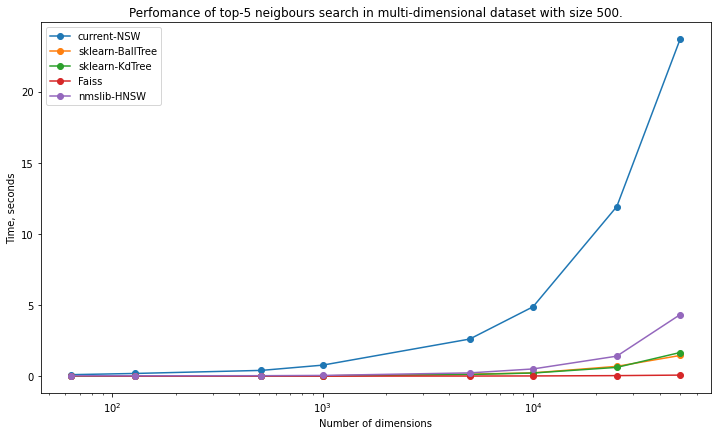

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.set_xscale('log')
ax.plot(dimensions,nsw,marker='o')
ax.plot(dimensions,ball,marker='o')
ax.plot(dimensions,kd,marker='o')
ax.plot(dimensions,faisses,marker='o')
ax.plot(dimensions,hnsws,marker='o')
ax.set_xscale('log')
plt.title(f'Perfomance of top-5 neigbours search in multi-dimensional dataset with size {n}.')
plt.legend(["current-NSW", "sklearn-BallTree", "sklearn-KdTree", "Faiss", "nmslib-HNSW"])
plt.xlabel("Number of dimensions", )
plt.ylabel("Time, seconds")
plt.show()

In [ ]:
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}


In [10]:
X = np.random.random((50, 64)).astype('float32')
query = np.random.random((10, 64)).astype('float32')

In [11]:
g = NSWGraph(len(X), len(X[0]))
g.build_navigable_graph(X)
closests = g.knnQueryBatch(query, top=5)

In [12]:
closests

[[11, 46, 28, 5, 41],
 [20, 15, 6, 14, 39],
 [9, 19, 46, 14, 11],
 [16, 27, 15, 19, 25],
 [41, 5, 45, 7, 10],
 [18, 7, 27, 16, 0],
 [22, 9, 46, 4, 39],
 [41, 22, 6, 14, 27],
 [2, 11, 3, 42, 41],
 [43, 15, 22, 27, 11]]